In [1]:
print("Hello from VS Code")

Hello from VS Code


In [2]:
# ==========================================
# 1. IMPORT LIBRARIES
# ==========================================

import pandas as pd
import numpy as np


In [9]:
# ==========================================
# 2. FILE CONFIGURATION
# ==========================================

FILE_PATH = '/data_lvm/Projects/Personal/FinGuard-Fraud-API/data/SyntheticFinancialDatasets.csv'

In [10]:
# ==========================================
# 3. LOADING DATASET
# ==========================================

try:
    df = pd.read_csv(FILE_PATH)
    print('CSV loaded successfully!')
except FileNotFoundError:
    print('The file was not found in the directory.')


CSV loaded successfully!


In [ ]:
# ==========================================
# 4. INITIAL DATA INSPECTION
# ==========================================

#-------------Preview Data-----------------
# to see the first few rows-----
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# random look at records.
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2143911,184,PAYMENT,22686.85,C1929227806,0.00,0.00,M23340199,0.00,0.00,0,0
6114120,527,PAYMENT,12506.34,C680669337,0.00,0.00,M45571095,0.00,0.00,0,0
6183177,567,CASH_OUT,259316.54,C1863708822,13007.00,0.00,C880279953,151451.18,410767.72,0,0
2812018,225,PAYMENT,60724.30,C524667739,55477.00,0.00,M1240901422,0.00,0.00,0,0
4155581,303,CASH_IN,366766.14,C1067381390,394.00,367160.14,C1477910601,0.00,0.00,0,0
711310,37,PAYMENT,2938.15,C1567458159,0.00,0.00,M778439357,0.00,0.00,0,0
5785815,400,CASH_OUT,21785.87,C664296319,111183.00,89397.13,C1082874450,130478.64,237775.97,0,0
109919,11,CASH_IN,59926.84,C233858551,25830.00,85756.84,C1499984101,0.00,153360.85,0,0
5403169,377,CASH_OUT,355069.84,C1389686101,61103.00,0.00,C1683610485,29271.89,384341.73,0,0
747404,38,CASH_IN,89957.74,C1067783434,1614237.63,1704195.36,C307368640,274072.60,184114.87,0,0


In [40]:
# --------------------- Dimensions -----------------------------
# to see the number of rows and columns
df.shape # we have 6362620 rows and 11 columns

(6362620, 11)

In [44]:
# ------------------- Schema & Types ----------------------------
# to check data types (numeric, categorical, datetime) and identify non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# ==========================================
# 5. Data Cleaning (Wrangling)
# ==========================================

# 5.1 => Missing Values: Use df.isnull().sum() to find gaps. Decide whether to drop them or fill them (imputation) using mean, median, or mode.

display(df.isnull())
display("Total values:",df.isnull().sum())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


'Total values:'

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [62]:
# 5.2 => Duplicates: Use df.duplicated().sum() to identify and remove redundant records.

display(df.duplicated().sum())
display(df.duplicated())

np.int64(0)

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [ ]:
# 5.3 Data Conversions: Ensure columns like "Dates" are actually in datetime format using pd.to_datetime().



In [ ]:
# ==========================================
# 6. Descriptive Statistics
# ==========================================


# 6. Summary Stats: Use df.describe() for numerical columns (mean, median, standard deviation, and quartiles).
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [68]:
# 6.2 Unique Values: Use df.nunique() to see how many unique entries exist in categorical columns.
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [72]:
# ==========================================
# 1. CHECK CLASS IMBALANCE
# ==========================================


# Count the number of fraud vs non-fraud cases
fraud_counts = df['isFraud'].value_counts()
fraud_percentage = df['isFraud'].value_counts(normalize=True) * 100
print("Transaction Counts:")
print(fraud_counts)
print("\nPercentage of Total Data:")
print(fraud_percentage)

Transaction Counts:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Percentage of Total Data:
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


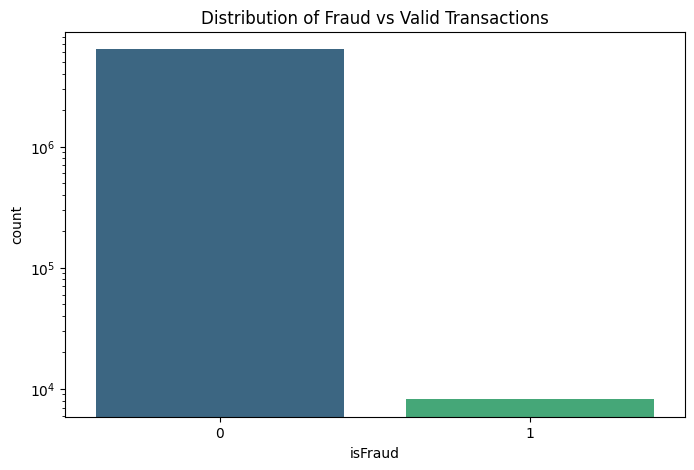

In [76]:
# # Visualizing the imbalance
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8, 5))
# Assign 'isFraud' to both x and hue to fix the warning
sns.countplot(x='isFraud', data=df, hue='isFraud', palette='viridis', legend=False)
plt.title('Distribution of Fraud vs Valid Transactions')
plt.yscale('log') 
plt.show()


Fraud count per Transaction Type:
isFraud          0         1
type                        
CASH_IN   0.220207  0.000000
CASH_OUT  0.351470  0.501157
DEBIT     0.006520  0.000000
PAYMENT   0.338583  0.000000
TRANSFER  0.083220  0.498843


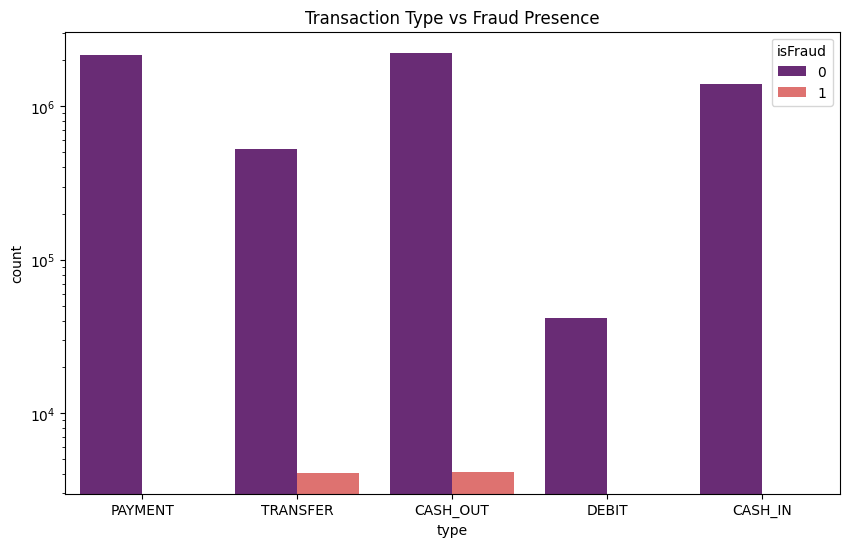

In [79]:
# ==========================================
# 2. FRAUD BY TRANSACTION TYPE
# ==========================================

# Create a cross-tabulation of Transaction Type vs Fraud
type_fraud_pivot = pd.crosstab(df['type'], df['isFraud'], normalize='columns')

print("Fraud count per Transaction Type:")
print(type_fraud_pivot)

# Visualizing the distribution of transaction types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df, palette='magma')
plt.title('Transaction Type vs Fraud Presence')
plt.yscale('log') # Essential to see the fraud bars
plt.show()


In [89]:
# ==========================================
# 3. AMOUNT ANALYSIS (FOR RISK TYPES ONLY)
# ==========================================

# Filtering data to only include the risky types we discovered
risky_types = ['TRANSFER', 'CASH_OUT']
df_risky = df[df['type'].isin(risky_types)]
display(df_risky)
print(f"Total Risky Transactions: {len(df_risky)}")


# Statistical summary of amounts for Fraud vs Valid
display("\nAmount Statistics (Fraud vs Valid):")
display(df_risky.groupby('isFraud')['amount'].describe())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


Total Risky Transactions: 2770409


'\nAmount Statistics (Fraud vs Valid):'

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,2762196.0,3.141155e+05,8.771441e+05,0.01,82908.2325,171034.46,305994.185,92445516.64
1,8213.0,1.467967e+06,2.404253e+06,0.00,127091.3300,441423.44,1517771.480,10000000.00


/tmp/ipykernel_218171/1215271115.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=df_risky, palette='Set2')


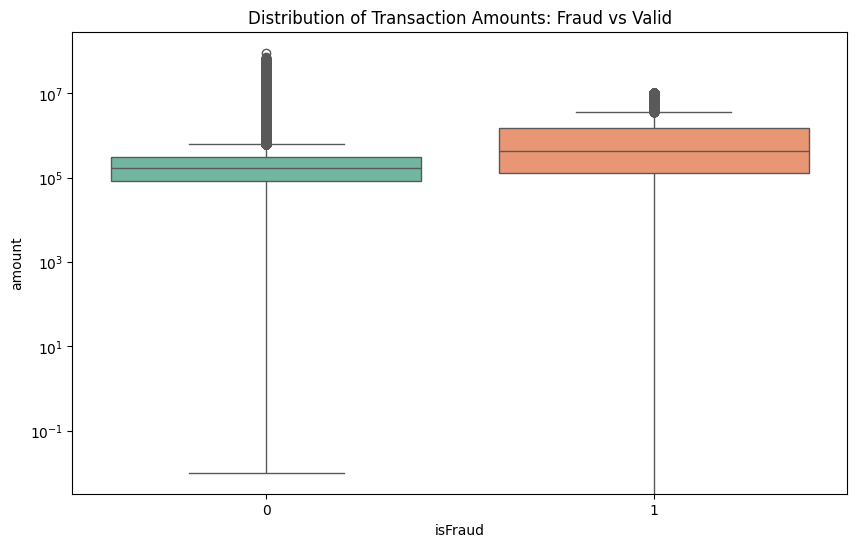

In [100]:
# Visualization using a Boxplot
plt.figure(figsize=(10,6))
# sns.boxplot(x='isFruad', y='amount', data=df_risky, palette='Set2') 
sns.boxplot(x='isFraud', y='amount', data=df_risky, palette='Set2')
plt.title('Distribution of Transaction Amounts: Fraud vs Valid')
plt.yscale('log') # Log scale helps handle the massive range of financial data
plt.show()

/tmp/ipykernel_218171/3890288730.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_risky['errorBalanceOrig'] = df_risky['oldbalanceOrg'] - df_risky['amount'] - df_risky['newbalanceOrig']
/tmp/ipykernel_218171/3890288730.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_risky['errorBalanceDest'] = df_risky['oldbalanceDest'] + df_risky['amount'] - df_risky['newbalanceDest']


'Summary of Balance Errors for Fraud vs Valid:'

errorBalanceOrig                                             \
                   count           mean            std          min   
isFraud                                                               
0              2762196.0 -286803.509954  876375.192156 -92445516.64   
1                 8213.0  -10692.325265  265146.131130 -10000000.00   

                                                        errorBalanceDest  \
                25%         50%       75%           max            count   
isFraud                                                                    
0       -280466.255 -144200.825 -52613.43  1.000000e-02        2762196.0   
1             0.000       0.000      0.00  3.725290e-09           8213.0   

                                                                            \
                  mean           std          min  25%      50%        75%   
isFraud                                                                      
0        -30910.325352  5.840943e+05 -75885725.63  0.0     0.00       0.00   
1        732509.301069  1.867748e+06  -8875516.29  0.0  2231.46  442722.01   

                      
                 max  
isFraud               
0         9977761.06  
1        10000000.00

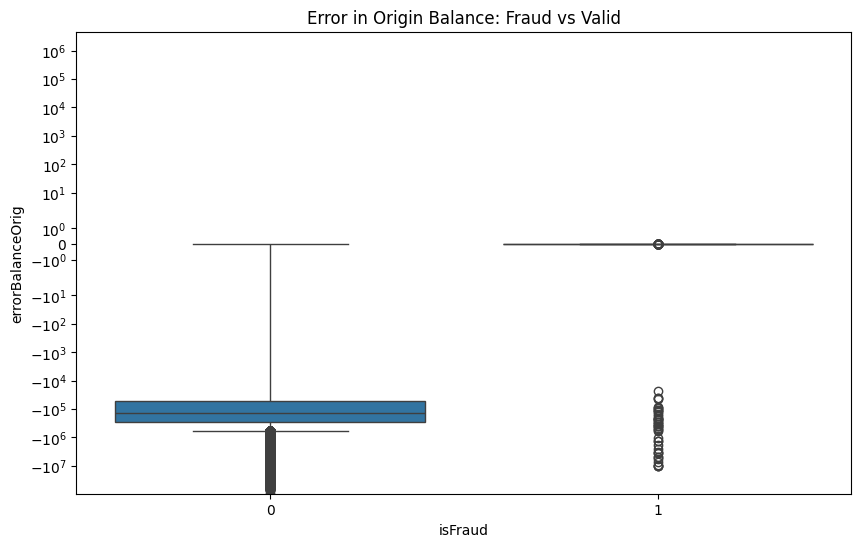

In [102]:
# ==========================================
# 4. BALANCE INTEGRITY ANALYSIS
# ==========================================

# Calculating the discrepancy in balances
# For Sender: Expected New Balance = Old Balance - Amount
df_risky['errorBalanceOrig'] = df_risky['oldbalanceOrg'] - df_risky['amount'] - df_risky['newbalanceOrig']

# For Receiver: Expected New Balance = Old Balance + Amount
df_risky['errorBalanceDest'] = df_risky['oldbalanceDest'] + df_risky['amount'] - df_risky['newbalanceDest']

display("Summary of Balance Errors for Fraud vs Valid:")
display(df_risky.groupby('isFraud')[['errorBalanceOrig', 'errorBalanceDest']].describe())

# Visualizing Error in Origin Balance
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='errorBalanceOrig', data=df_risky)
plt.title('Error in Origin Balance: Fraud vs Valid')
plt.yscale('symlog') # Handles both large positive and negative errors
plt.show()


In [103]:
display(df_risky.describe())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
count,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06
mean,2.420081e+02,3.175361e+05,4.764308e+04,1.609190e+04,1.703551e+06,2.049734e+06,2.964544e-03,5.775321e-06,-2.859850e+05,-2.864713e+04
std,1.416191e+02,8.877897e+05,2.513251e+05,1.512558e+05,4.225550e+06,4.676990e+06,5.436687e-02,2.403183e-03,8.753230e+05,5.934794e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.244552e+07,-7.588573e+07
25%,1.550000e+02,8.297354e+04,0.000000e+00,0.000000e+00,1.280734e+05,3.272891e+05,0.000000e+00,0.000000e+00,-2.798912e+05,0.000000e+00
50%,2.360000e+02,1.712609e+05,3.039600e+02,0.000000e+00,5.557100e+05,8.280539e+05,0.000000e+00,0.000000e+00,-1.435971e+05,0.000000e+00
75%,3.320000e+02,3.067912e+05,3.099700e+04,0.000000e+00,1.735900e+06,2.122198e+06,0.000000e+00,0.000000e+00,-5.185310e+04,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+07


/tmp/ipykernel_218171/3485391474.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_risky['hour'] = df_risky['step'] % 24


'Fraud Counts by Hour of Day:'

isFraud,0,1
hour,,
0,17914,300
1,5647,358
2,1550,372
3,454,326
4,238,274
5,266,366
6,546,358
7,2214,328
8,9934,368


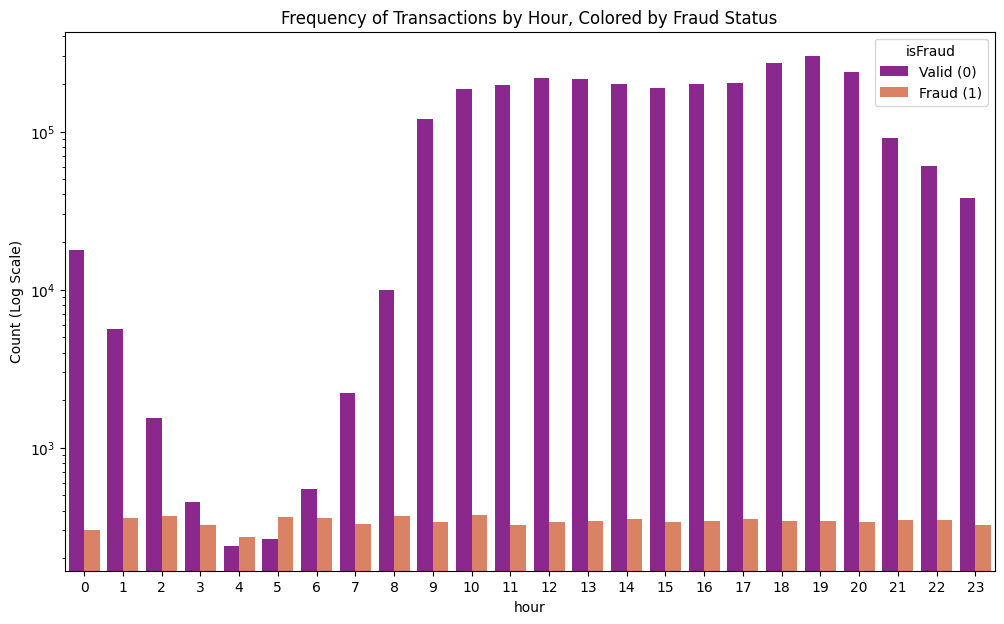

In [105]:
# ==========================================
# 5. TIME OF DAY ANALYSIS
# ==========================================

# Calculate the actual hour of the day (modulo 24)
df_risky['hour'] = df_risky['step'] % 24

# Create a pivot table to compare fraud frequency by hour
hour_fraud_pivot = pd.crosstab(df_risky['hour'], df_risky['isFraud'])

display("Fraud Counts by Hour of Day:")
display(hour_fraud_pivot)

# Visualizing fraud counts by hour
plt.figure(figsize=(12, 7))
sns.countplot(x='hour', hue='isFraud', data=df_risky, palette='plasma')
plt.title('Frequency of Transactions by Hour, Colored by Fraud Status')
plt.ylabel('Count (Log Scale)')
plt.yscale('log')
plt.legend(title='isFraud', labels=['Valid (0)', 'Fraud (1)'])
plt.show()
